.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into object.
churn_data = pd.read_csv('churn_data_cleaned.csv')
churn_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_7_2.0,fb_8_1.0,fb_8_2.0,total_data_amt_6,total_data_amt_7,total_data_amt_8,churn,days_forrech_before_month_end_6,days_forrech_before_month_end_7,days_forrech_before_month_end_8
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,1,0,1,0.0,0.0,0.0,1,3.0,34.0,65.0
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,1,0,0.0,354.0,207.0,0,5.0,36.0,67.0
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,1,0,1,0.0,0.0,0.0,0,0.0,31.0,62.0
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,1,0,0.0,712.0,540.0,0,12.0,43.0,74.0
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,5285.0,20424.0,455.0,0,0.0,31.0,62.0


In [3]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [4]:
# Putting feature variable to X
X = churn_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_data['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [5]:
# combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_train_balance, y_train_balance = smt.fit_sample(X_train,y_train)

In [6]:
##Starting the Feature reduction using Lasso regression and using sklearns selectfrommodel library
from sklearn.svm import LinearSVC
#from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
 
linear_svc = LinearSVC(C=0.0001,penalty="l1", dual=False)
linear_svc_model = SelectFromModel(linear_svc)
linear_svc_model.fit(X_train_balance,y_train_balance)
X_train_lasso = linear_svc_model.transform(X_train_balance)
col_list = linear_svc_model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_train_lasso.shape)

(37618, 62)


In [7]:
columns_after_lasso = list(X.columns[col_list])
columns_after_lasso

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_6',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb

In [8]:
X_train_fetaure_reduced= X_train_lasso
Y_train_fetaure_reduced= y_train_balance

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [9]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [10]:
# fit
rfc.fit(X_train_fetaure_reduced,Y_train_fetaure_reduced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, col_list]
predictions = rfc.predict(X_test)

In [12]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [13]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8079
           1       0.45      0.48      0.46       473

   micro avg       0.94      0.94      0.94      8552
   macro avg       0.71      0.72      0.71      8552
weighted avg       0.94      0.94      0.94      8552



In [14]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7796  283]
 [ 246  227]]


In [15]:
print(accuracy_score(y_test,predictions))

0.9381431244153414


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

In [16]:
##Tuning for max depth

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [17]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.360443,0.006514,0.008580,0.000787,2,{'max_depth': 2},0.806752,0.806885,0.838650,0.793461,...,0.814424,0.016031,4,0.833621,0.812488,0.838074,0.785107,0.827519,0.819362,0.019187
1,0.919335,0.012840,0.011373,0.000486,7,{'max_depth': 7},0.874668,0.900319,0.894870,0.896863,...,0.893349,0.009559,3,0.907290,0.904632,0.902971,0.898950,0.904904,0.903750,0.002767
2,1.460298,0.101833,0.015766,0.001159,12,{'max_depth': 12},0.923977,0.946571,0.948565,0.948830,...,0.942793,0.009472,2,0.978866,0.975244,0.974314,0.974613,0.973385,0.975284,0.001888
3,2.089219,0.233462,0.021940,0.001991,17,{'max_depth': 17},0.936869,0.958931,0.962786,0.963849,...,0.957733,0.010695,1,0.991925,0.992125,0.993254,0.990463,0.992590,0.992072,0.000925


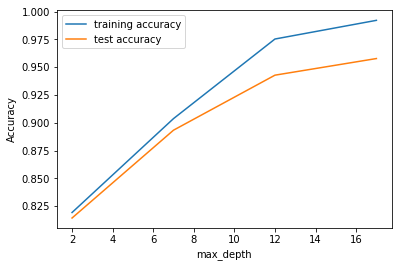

In [18]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We will take the max_depth in the range of 4-12

In [19]:
## Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.925491,0.294657,0.099135,0.017166,100,{'n_estimators': 100},0.852206,0.866295,0.862972,0.869617,...,0.862486,0.005875,4,0.874261,0.866086,0.865455,0.858743,0.864234,0.865756,0.004981
1,28.896567,0.828954,0.345471,0.013447,500,{'n_estimators': 500},0.850611,0.864833,0.864567,0.874003,...,0.863682,0.007483,3,0.873895,0.864159,0.866651,0.862763,0.866394,0.866773,0.003842
2,50.259172,0.258848,0.609181,0.025559,900,{'n_estimators': 900},0.851808,0.866162,0.863769,0.873737,...,0.864108,0.007061,2,0.873031,0.866219,0.865854,0.862664,0.866527,0.866859,0.003383
3,74.213008,1.454070,0.913351,0.049550,1300,{'n_estimators': 1300},0.851409,0.866162,0.866029,0.875066,...,0.864506,0.007597,1,0.874028,0.865787,0.866618,0.863827,0.866261,0.867304,0.003498


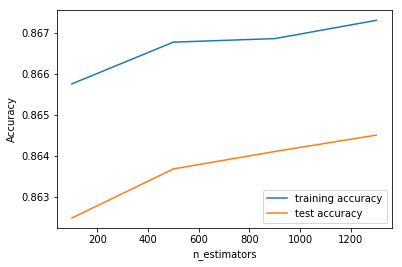

In [21]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we will take the values 100 - 200 increments of 50

In [22]:
### Tuning max_features
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.387164,0.005759,0.009973,0.000630,4,{'max_features': 4},0.825093,0.851010,0.853137,0.867092,...,0.845446,0.015392,5,0.845551,0.849638,0.847711,0.856981,0.832071,0.846390,0.008127
1,0.667815,0.010183,0.009583,0.001193,8,{'max_features': 8},0.829612,0.861510,0.852339,0.853668,...,0.852544,0.012473,4,0.851499,0.862232,0.854489,0.843723,0.862274,0.854843,0.006997
2,1.108636,0.007533,0.009382,0.000483,14,{'max_features': 14},0.839846,0.859117,0.859250,0.869883,...,0.857754,0.009803,1,0.863096,0.858809,0.860437,0.860936,0.860779,0.860811,0.001370
3,1.602914,0.095397,0.009575,0.000488,20,{'max_features': 20},0.847156,0.851940,0.862440,0.863371,...,0.857329,0.006551,2,0.868080,0.855453,0.864292,0.854057,0.860214,0.860419,0.005270
4,1.816744,0.024173,0.009591,0.000486,24,{'max_features': 24},0.846225,0.856459,0.858586,0.860048,...,0.856053,0.005050,3,0.866485,0.859241,0.860039,0.852329,0.856991,0.859017,0.004598


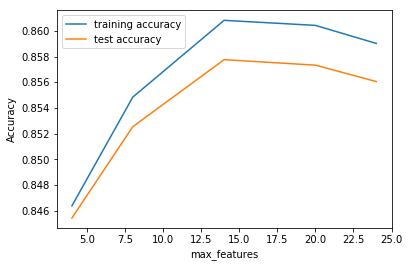

In [24]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We will take 5, 10, 15 as values.

In [25]:
### Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.085690,0.011373,0.013363,0.000490,100,{'min_samples_leaf': 100},0.873472,0.887028,0.892079,0.902313,...,0.890292,0.009805,1,0.901143,0.892570,0.894597,0.894132,0.898824,0.896253,0.003204
1,1.007699,0.020084,0.013172,0.000754,150,{'min_samples_leaf': 150},0.862041,0.890617,0.885300,0.894870,...,0.883566,0.011366,2,0.894132,0.891540,0.886090,0.882601,0.884603,0.887793,0.004342
2,0.938284,0.026126,0.012773,0.000739,200,{'min_samples_leaf': 200},0.860181,0.877858,0.879851,0.893009,...,0.877160,0.010510,3,0.885991,0.880541,0.880175,0.879444,0.877359,0.880702,0.002865
3,0.914947,0.031667,0.011776,0.000758,250,{'min_samples_leaf': 250},0.855396,0.875598,0.879452,0.883041,...,0.874448,0.009816,4,0.881039,0.878082,0.882136,0.874659,0.878987,0.878981,0.002595
4,0.852919,0.012762,0.012367,0.001353,300,{'min_samples_leaf': 300},0.849149,0.875731,0.872275,0.881712,...,0.869318,0.011071,5,0.874327,0.876254,0.873463,0.871935,0.873073,0.873810,0.001444


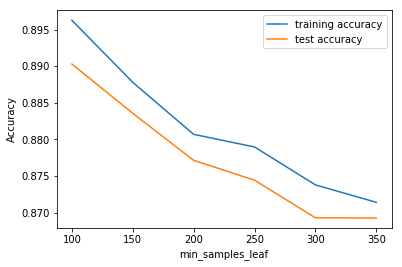

In [27]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We will take the sample between 100 - 200 with oncrements of 50

In [28]:
### Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.469862,0.012163,0.014962,7.478899e-07,200,{'min_samples_split': 200},0.877990,0.910287,0.901249,0.907629,...,0.900633,0.011697,1,0.920117,0.916960,0.915963,0.911909,0.912414,0.915473,0.003036
1,1.449733,0.053928,0.015354,1.851897e-03,250,{'min_samples_split': 250},0.873073,0.894870,0.903509,0.908028,...,0.895608,0.012115,2,0.913205,0.905695,0.908188,0.905928,0.906765,0.907956,0.002766
2,1.438953,0.083064,0.013366,4.872962e-04,300,{'min_samples_split': 300},0.869219,0.898060,0.898060,0.908161,...,0.894758,0.013299,3,0.912275,0.900877,0.902240,0.902273,0.902412,0.904015,0.004167
3,1.341615,0.035217,0.014163,1.468625e-03,350,{'min_samples_split': 350},0.869086,0.891813,0.900452,0.900851,...,0.890691,0.011549,4,0.907390,0.898518,0.903070,0.895660,0.901050,0.901138,0.003993
4,1.335023,0.074242,0.013973,1.102845e-03,400,{'min_samples_split': 400},0.871345,0.886364,0.896465,0.900053,...,0.888750,0.009965,5,0.905230,0.892703,0.900578,0.894398,0.892644,0.897110,0.004994


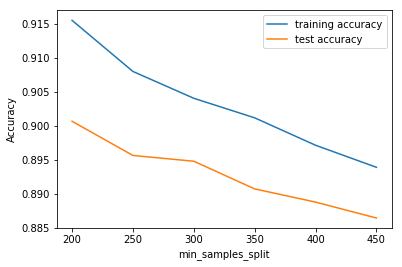

In [30]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We see that the accuracy drops after 350 drastically. We wil check it between 200 -400 in increments of 100

## Grid Search to Find Optimal Hyperparameters

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8,10,12],
    'min_samples_leaf': range(100, 200, 50),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 50], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [32]:
# Fit the grid search to the data
grid_search.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 44.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': range(100, 200, 50), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 50], 'max_features': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8939071720984635 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [34]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12.,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [35]:
# fit
rfc.fit(X_train_fetaure_reduced,Y_train_fetaure_reduced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12.0, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
# predict
#X_test = pd.DataFrame(data=X_test).iloc[:, col_list]
predictions = rfc.predict(X_test)

In [37]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      8079
           1       0.32      0.70      0.44       473

   micro avg       0.90      0.90      0.90      8552
   macro avg       0.65      0.81      0.69      8552
weighted avg       0.94      0.90      0.92      8552



In [39]:

print(confusion_matrix(y_test,predictions))


[[7375  704]
 [ 140  333]]


In [40]:
print(accuracy_score(y_test,predictions))

0.901309635173059


## Conclusion

We have used Lasso regression to eliminate the features and we got 62 features.

We have tuned the hyper parameters and the values are 'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100
                    
The accuracy of test data is 90%. This is the best model which we will use for churn prediction.